In [53]:
# Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_curve, auc, mean_squared_error, root_mean_squared_error, mean_absolute_error)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [54]:
# ЗАДАНИЕ 1
df = pd.read_csv('processed_titanic.csv')
print(f"Размер датасета: {df.shape}")
print(df.head())
print(f"\nИнформация о данных:")
print(df.info())

Размер датасета: (891, 18)
   PassengerId  Survived  Pclass       Age     SibSp     Parch      Fare  \
0            1         0       3 -0.497793  0.432793 -0.473674 -0.502445   
1            2         1       1  0.715048  0.432793 -0.473674  0.786845   
2            3         1       3 -0.194583 -0.474545 -0.473674 -0.488854   
3            4         1       1  0.487640  0.432793 -0.473674  0.420730   
4            5         0       3  0.487640 -0.474545 -0.473674 -0.486337   

   Sex_male  Embarked_Q  Embarked_S  Cabin_B  Cabin_C  Cabin_D  Cabin_E  \
0      True       False        True    False    False    False    False   
1     False       False       False    False     True    False    False   
2     False       False        True    False    False    False    False   
3     False       False        True    False     True    False    False   
4      True       False        True    False    False    False    False   

   Cabin_F  Cabin_G  Cabin_T  Cabin_U  
0    False    False    Fa

In [55]:
# Подготовка данных для регрессии и классификации
# Для регрессии: предсказание возраста (Age)
X_reg = df.drop(['Age', 'Survived'], axis=1)
y_reg = df['Age']

# Для классификации: предсказание выживания (Survived)
X_clf = df.drop(['Survived', 'Age'], axis=1)
y_clf = df['Survived']

# Разделение на обучающую и тестовую выборки
# Для регрессии
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Для классификации
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42, stratify=y_clf)

print("Размеры выборок для регрессии:")
print(f"Обучающая: {X_reg_train.shape}, Тестовая: {X_reg_test.shape}")
print("\nРазмеры выборок для классификации:")
print(f"Обучающая: {X_clf_train.shape}, Тестовая: {X_clf_test.shape}")

Размеры выборок для регрессии:
Обучающая: (623, 16), Тестовая: (268, 16)

Размеры выборок для классификации:
Обучающая: (623, 16), Тестовая: (268, 16)


РЕГРЕССИЯ ДЕРЕВОМ РЕШЕНИЙ
ОЦЕНКА РЕГРЕССИОННОЙ МОДЕЛИ:
MSE: 0.8096
RMSE: 0.8998
MAE: 0.6686


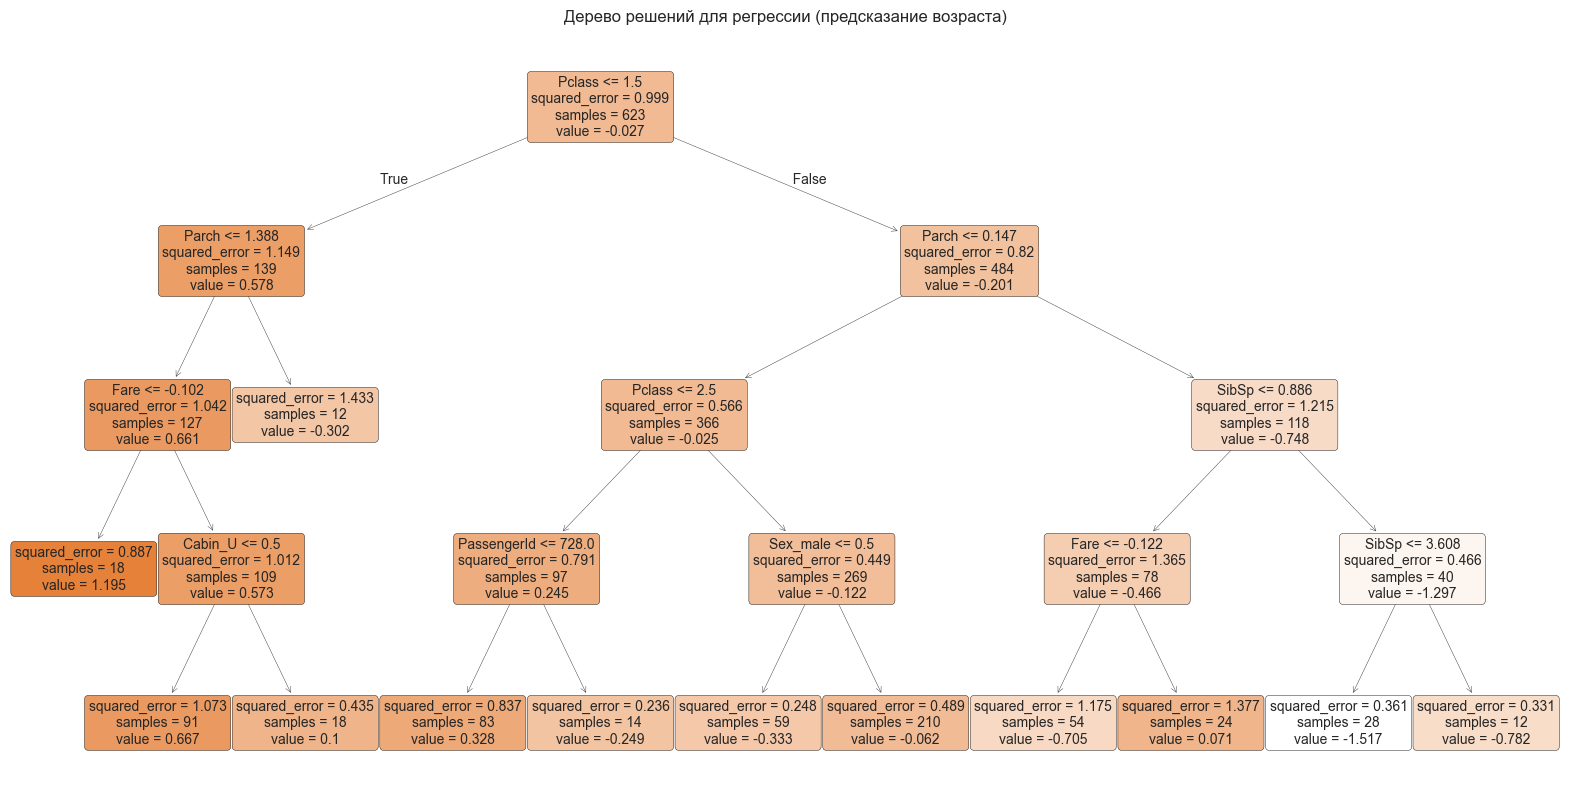

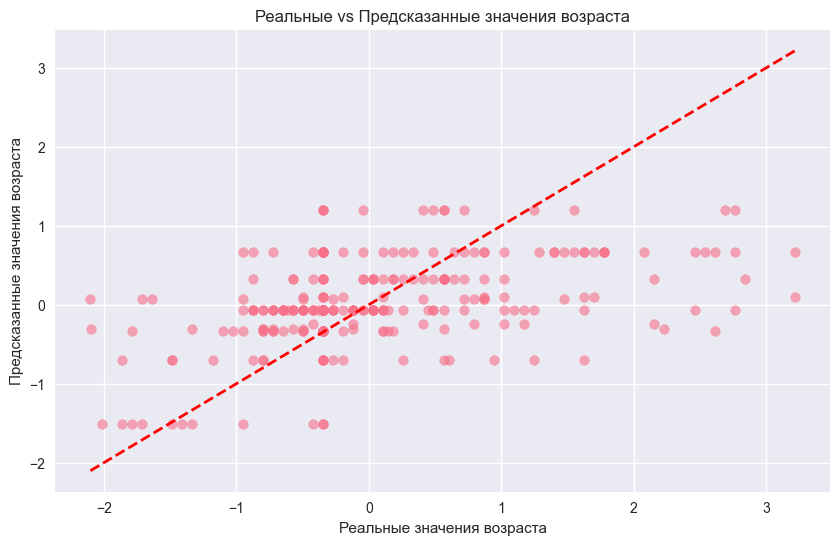

ВАЖНОСТЬ ПРИЗНАКОВ ДЛЯ РЕГРЕССИИ:
        feature  importance
1        Pclass    0.410698
3         Parch    0.310870
2         SibSp    0.124502
4          Fare    0.087357
15      Cabin_U    0.026378
0   PassengerId    0.021777
5      Sex_male    0.018419
6    Embarked_Q    0.000000
7    Embarked_S    0.000000
8       Cabin_B    0.000000
10      Cabin_D    0.000000
9       Cabin_C    0.000000
11      Cabin_E    0.000000
12      Cabin_F    0.000000
13      Cabin_G    0.000000
14      Cabin_T    0.000000


In [56]:
# ЗАДАНИЕ 2: Решение задачи регрессии
print("РЕГРЕССИЯ ДЕРЕВОМ РЕШЕНИЙ")

# Создание и обучение модели дерева решений для регрессии
dt_regressor = DecisionTreeRegressor(
    max_depth=4,        # Ограничение глубины для избежания переобучения
    min_samples_split=20, # Минимальное количество samples для разделения
    min_samples_leaf=10, # Минимальное количество samples в листе
    random_state=42)

dt_regressor.fit(X_reg_train, y_reg_train)

# Предсказание на тестовой выборке
y_reg_pred = dt_regressor.predict(X_reg_test)

# Оценка модели регрессии
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = root_mean_squared_error(y_reg_test, y_reg_pred)
mae = mean_absolute_error(y_reg_test, y_reg_pred)

print("ОЦЕНКА РЕГРЕССИОННОЙ МОДЕЛИ:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, 
          feature_names=X_reg.columns,
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title('Дерево решений для регрессии (предсказание возраста)')
plt.show()

# Сравнение предсказаний с реальными значениями
plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.6)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Реальные значения возраста')
plt.ylabel('Предсказанные значения возраста')
plt.title('Реальные vs Предсказанные значения возраста')
plt.show()

# Анализ важности признаков для регрессии
feature_importance_reg = pd.DataFrame({
    'feature': X_reg.columns,
    'importance': dt_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print("ВАЖНОСТЬ ПРИЗНАКОВ ДЛЯ РЕГРЕССИИ:")
print(feature_importance_reg)

КЛАССИФИКАЦИЯ ДЕРЕВОМ РЕШЕНИЙ
ОЦЕНКА КЛАССИФИКАЦИОННОЙ МОДЕЛИ:
Accuracy: 0.7612


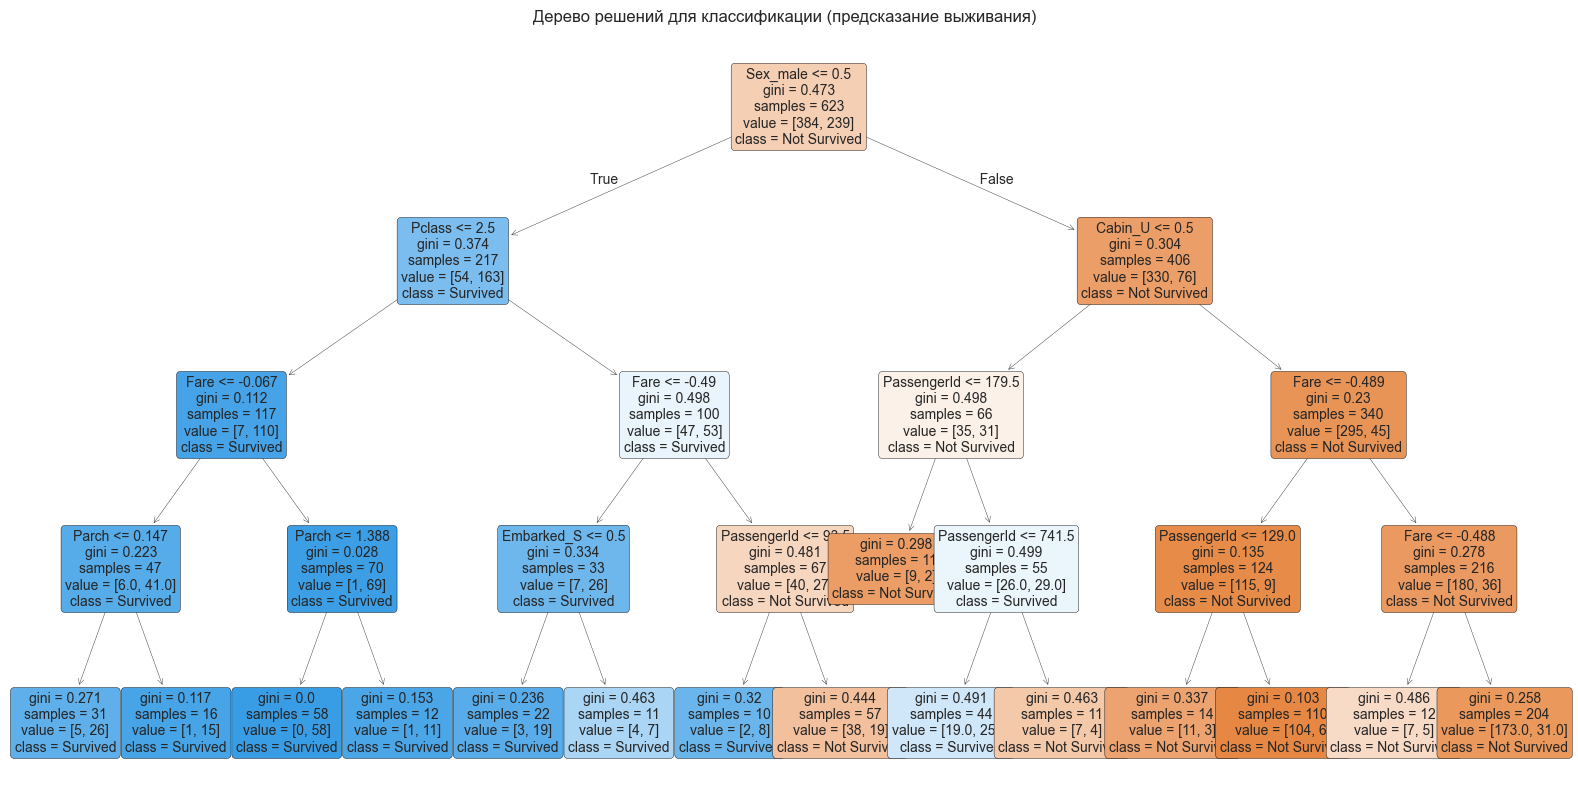

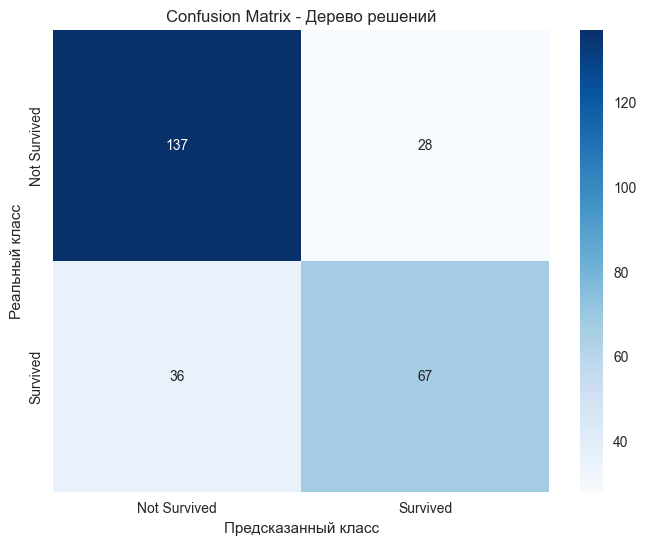


ПОЛНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:
              precision    recall  f1-score   support

Not Survived       0.79      0.83      0.81       165
    Survived       0.71      0.65      0.68       103

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [57]:
# ЗАДАНИЕ 3: Решение задачи классификации
print("КЛАССИФИКАЦИЯ ДЕРЕВОМ РЕШЕНИЙ")

# Создание и обучение модели дерева решений для классификации
dt_classifier = DecisionTreeClassifier(
    max_depth=4,    
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42)

dt_classifier.fit(X_clf_train, y_clf_train)

# Предсказание на тестовой выборке
y_clf_pred = dt_classifier.predict(X_clf_test)
y_clf_proba = dt_classifier.predict_proba(X_clf_test)[:, 1] 

# Оценка модели классификации
accuracy = accuracy_score(y_clf_test, y_clf_pred)

print("ОЦЕНКА КЛАССИФИКАЦИОННОЙ МОДЕЛИ:")
print(f"Accuracy: {accuracy:.4f}")

# Визуализация дерева классификации
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          feature_names=X_clf.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title('Дерево решений для классификации (предсказание выживания)')
plt.show()

# Матрица ошибок
cm = confusion_matrix(y_clf_test, y_clf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix - Дерево решений')
plt.ylabel('Реальный класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Полный отчет классификации
print("\nПОЛНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:")
print(classification_report(y_clf_test, y_clf_pred, 
                          target_names=['Not Survived', 'Survived']))

ROC-КРИВАЯ
ROC-AUC Score: 0.8213


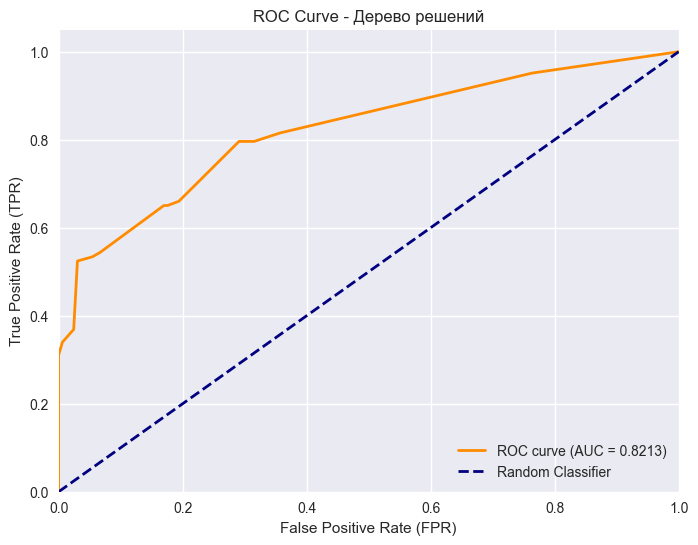

АНАЛИЗ ПОРОГОВ КЛАССИФИКАЦИИ:
   threshold       fpr       tpr
0        inf  0.000000  0.000000
1   1.000000  0.000000  0.252427
2   0.937500  0.000000  0.310680
3   0.916667  0.006061  0.339806
4   0.863636  0.024242  0.368932
5   0.838710  0.030303  0.524272
6   0.800000  0.054545  0.533981
7   0.636364  0.066667  0.543689
8   0.568182  0.169697  0.650485
9   0.416667  0.175758  0.650485

ВЕРОЯТНОСТНЫЕ ПРЕДСКАЗАНИЯ (первые 10 объектов):
     True_Class  Prob_Not_Survived  Prob_Survived  Predicted_Class
625           0           0.431818       0.568182                1
566           0           0.945455       0.054545                0
459           0           0.945455       0.054545                0
804           1           0.945455       0.054545                0
338           1           0.848039       0.151961                0
745           0           0.636364       0.363636                0
277           0           0.945455       0.054545                0
473           1      

In [58]:
# ROC-кривая
print("ROC-КРИВАЯ")

# Построение 
fpr, tpr, thresholds = roc_curve(y_clf_test, y_clf_proba)
roc_auc = auc(fpr, tpr)

print(f"ROC-AUC Score: {roc_auc:.4f}")

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Дерево решений')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Анализ порогов классификации
threshold_analysis = pd.DataFrame({
    'threshold': thresholds,
    'fpr': fpr,
    'tpr': tpr
})

print("АНАЛИЗ ПОРОГОВ КЛАССИФИКАЦИИ:")
print(threshold_analysis.head(10))

# Вероятностные предсказания для первых 10 объектов
probabilities_df = pd.DataFrame({
    'True_Class': y_clf_test[:10],
    'Prob_Not_Survived': dt_classifier.predict_proba(X_clf_test)[:10, 0],
    'Prob_Survived': dt_classifier.predict_proba(X_clf_test)[:10, 1],
    'Predicted_Class': y_clf_pred[:10]
})

print("\nВЕРОЯТНОСТНЫЕ ПРЕДСКАЗАНИЯ (первые 10 объектов):")
print(probabilities_df)